In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Creating blobs and visualizing it

In [2]:
blobs, classes = make_blobs(500, centers = 3)

In [3]:
print(blobs.shape, classes.shape)
np.unique(classes)

(500, 2) (500,)


array([0, 1, 2])

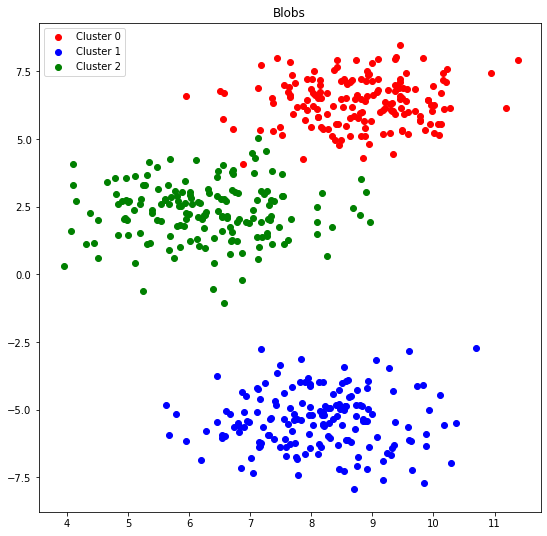

In [7]:
fig, ax = plt.subplots(figsize = (9, 9))
rgb = ['red', 'blue', 'green']
for i in range(3):
    points = blobs[classes == i]
    ax.scatter(points[:,0], points[:,1], color = rgb[i], label = 'Cluster {}'.format(i))
ax.set_title('Blobs')
ax.legend()
plt.show()

# 2. Using KMeans algorithm to cluster blobs

In [9]:
kmeans = KMeans(n_clusters = 3)

In [10]:
kmeans.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[ 6.24023388,  2.28034107],
       [ 8.0991647 , -5.37863112],
       [ 8.7736317 ,  6.3444867 ]])

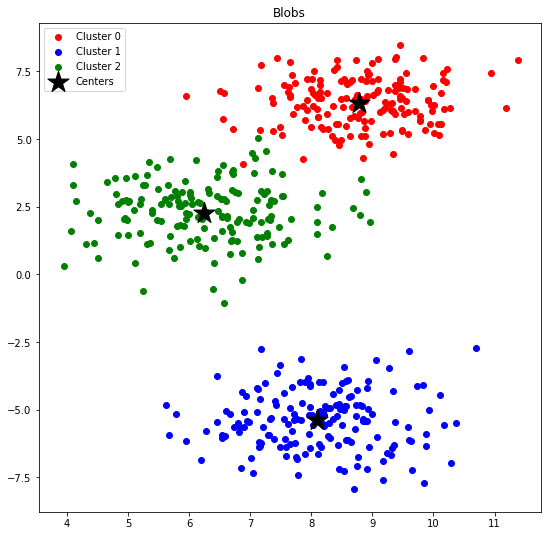

In [12]:
fig, ax = plt.subplots(figsize = (9, 9))
for i in range(3):
    points = blobs[classes == i]
    ax.scatter(points[:, 0], points[:, 1], color = rgb[i], label = 'Cluster {}'.format(i))
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '*', s = 500, color = 'black', label = 'Centers')
ax.set_title('Blobs')
ax.legend(loc = 'best')
plt.show()

#### Finding optimal n_cluster is a challenge; however, one can follow Silhouette score to pick optimal n_cluster. The next is to depict to that.

# 3. Optimizing the number of centroids by Silhouette score

In [13]:
silhouette_avgs = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k).fit(blobs)
    silhouette_avgs.append(silhouette_score(blobs, kmeans.labels_))

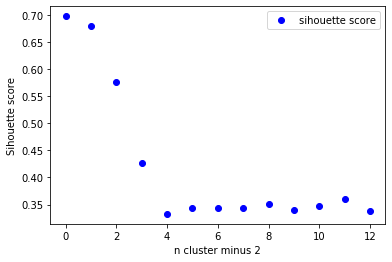

In [14]:
plt.plot(silhouette_avgs, 'bo', label = 'sihouette score')
plt.xlabel('n cluster minus 2')
plt.ylabel('Sihouette score')
plt.legend()
plt.show()

### As above figure, one can see the number of centroids should be 2 or 3.